In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import math as m
from random import sample

# Allure des données

In [2]:
New=pd.read_csv("BonneData.csv",index_col=0)
New

,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01
MMM,67.71,67.71,67.71,66.42,65.66,65.66,65.66,65.66,65.66,64.21,...,64.54,64.54,64.24,64.24,64.24,64.24,64.24,64.24,34.53,34.53
AOS,46.51,46.51,46.51,46.51,46.51,46.51,46.51,46.51,46.87,47.18,...,46.73,46.73,46.69,46.61,46.61,46.61,46.61,46.61,46.18,25.14
ABT,67.74,67.74,67.74,67.74,67.86,67.06,67.86,67.06,67.06,66.41,...,61.87,61.87,63.07,63.07,63.07,63.07,63.07,63.07,30.62,30.62
ABBV,63.00,63.00,66.13,66.09,66.23,66.23,66.23,66.23,66.23,66.44,...,64.19,64.19,64.19,64.19,65.67,65.67,65.17,65.17,30.35,30.35
ACN,74.58,74.58,74.58,74.58,74.58,74.58,74.58,74.58,74.58,74.18,...,73.76,73.76,73.76,73.76,73.76,73.76,73.71,73.71,15.32,15.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IPG,56.16,56.16,56.16,56.16,55.96,55.96,55.96,55.96,55.96,57.41,...,59.47,59.31,59.85,58.13,58.13,58.13,59.13,59.13,57.46,16.14
IFF,68.50,68.50,68.50,68.50,68.50,68.50,68.50,68.60,68.60,68.16,...,73.28,73.28,73.28,73.55,73.55,73.55,74.28,80.05,79.31,24.86
INTU,59.20,59.20,59.20,59.20,60.20,60.20,60.20,60.20,60.20,61.96,...,62.48,62.48,62.48,60.88,60.88,60.88,60.68,60.68,58.63,18.15
ISRG,47.28,47.28,47.28,47.28,47.28,47.28,47.28,47.28,47.28,46.55,...,48.04,48.04,48.04,48.04,48.04,48.04,48.04,48.04,47.09,35.12


# Clustering 1D

In [3]:
from jenkspy import JenksNaturalBreaks

In [4]:
for i in range(2,12):
    A=[]
    B=[]
    C=[]
    D=[]
    E=[]
    F=[]

    jnb=JenksNaturalBreaks(i)

    jnb.fit(New["2017-01-01"])
    A.append(jnb.inner_breaks_)
    jnb.fit(New["2017-07-01"])
    B.append(jnb.inner_breaks_)
    jnb.fit(New["2018-01-01"])
    C.append(jnb.inner_breaks_)
    jnb.fit(New["2018-07-01"])
    D.append(jnb.inner_breaks_)
    jnb.fit(New["2019-01-01"])
    E.append(jnb.inner_breaks_)
    jnb.fit(New["2019-07-01"])
    F.append(jnb.inner_breaks_)
    R1=np.add(A[0],B[0])
    R2=np.add(R1,C[0])
    R3=np.add(R2,D[0])
    R4=np.add(R3,E[0])
    R5=np.add(R4,F[0])
    print(R5/6)
    

    #print(breaks)


[59.02166667]
[54.28166667 65.18      ]
[52.08333333 60.48333333 69.35      ]
[49.55666667 55.93       62.74333333 70.59666667]
[49.3        55.18833333 61.02       66.60333333 72.705     ]
[48.72833333 53.87333333 59.14       64.01333333 68.93833333 75.00166667]
[48.10333333 52.8        57.14166667 61.4        65.62       70.43833333
 76.085     ]
[47.11166667 50.75       54.39833333 58.10666667 62.03833333 66.36666667
 71.50666667 76.99833333]
[46.28166667 49.885      53.245      56.66666667 60.18833333 63.55166667
 67.08666667 71.59166667 76.99833333]
[45.09833333 48.715      51.79333333 54.72166667 57.96166667 61.37166667
 64.96666667 68.58333333 73.14333333 78.85833333]


In [5]:
liste3clusters=[[0,54.28],[54.28,65.18],[65.18,100]] # 3
liste4clusters=[[0,52.08],[52.08,60.48],[60.48,69.35],[69.35,100]]


## Plot des Clusters

Text(0.5, 0, 'Notation ESG des actifs')

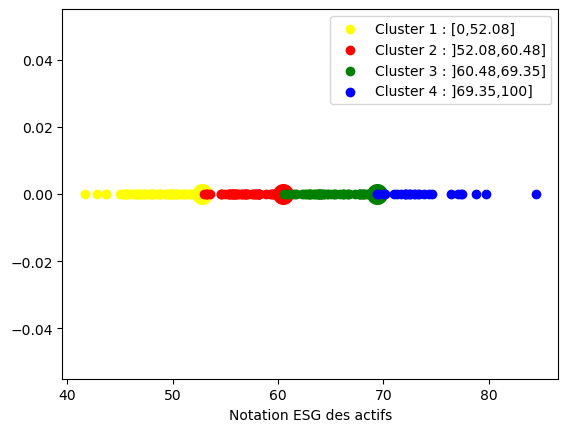

In [6]:
X = New[New["2017-01-01"]<52.803]["2017-01-01"]
Y=New[(New["2017-01-01"]>52.803)& (New["2017-01-01"]<60.483)]["2017-01-01"]
Z=New[(New["2017-01-01"]>60.483)& (New["2017-01-01"]<69.35)]["2017-01-01"]
V=New[New["2017-01-01"]>69.35]["2017-01-01"]
plt.scatter([52.803],[0],c="yellow",s=200)
plt.scatter([60.483],[0],c="red",s=200)
plt.scatter([69.35],[0],c="green",s=200)


plt.scatter( X, [0] * X.shape[0],c="yellow",label="Cluster 1 : [0,52.08]")
plt.scatter( Y, [0] * Y.shape[0],c="red",label="Cluster 2 : ]52.08,60.48]")
plt.scatter( Z, [0] * Z.shape[0],c="green",label="Cluster 3 : ]60.48,69.35]")
plt.scatter( V, [0] * V.shape[0],c="blue",label="Cluster 4 : ]69.35,100]")
plt.legend()

plt.xlabel("Notation ESG des actifs")

## Définition de la fonction MatriceTransition

In [7]:
def MatriceTransition(liste):
    L=[pd.Interval(liste[i][0],liste[i][1]) for i in range(0,len(liste))]
    Q=[]
    for i in tqdm(range((len(New)))):
        R=[]
        for j in range(len(New.values[i])):
            for l in range(len(L)):
                if New.values[i][j] in L[l]:
                    R.append(L[l])
                
            #if FScore.values[i][j]>50:
             #   print("Erreur")
            #elif FScore.values[i][j] in A:
             #   R.append(A)
            #elif FScore.values[i][j] in B:
             #   R.append(B)
            #elif FScore.values[i][j] in C:
            #    R.append(C)
            #else:
             #   R.append(D)
        Q.append(R)
    data=pd.DataFrame(Q,index=New.index)
    data.columns=New.columns
    return data

def ProbaTransition(periode,liste):
    data=MatriceTransition(liste)
    L=[pd.Interval(liste[i][0],liste[i][1]) for i in range(0,len(liste))]
    U=np.zeros(shape=(len(liste),len(liste)))
    if periode=="annuelle":
        G=data.loc[:,["2017-01-01","2018-01-01","2019-01-01"]].copy()  
        ProbaTransitionPremièreAnnée=pd.DataFrame(U)
        ProbaTransitionPremièreAnnée.index=L
        ProbaTransitionPremièreAnnée.columns=L
        ProbaTransitionSecondeAnnée=pd.DataFrame(U)
        ProbaTransitionSecondeAnnée.index=L
        ProbaTransitionSecondeAnnée.columns=L
        MPremièrePériode=[]
        MSecondePériode=[]
        for element in L:
            ProbaTransitionPremièreAnnée[element]=(G[G["2017-01-01"]==element]["2018-01-01"].value_counts()/np.sum(G[G["2017-01-01"]==element]["2018-01-01"].value_counts()))
            ProbaTransitionSecondeAnnée[element]=(G[G["2018-01-01"]==element]["2019-01-01"].value_counts()/np.sum(G[G["2018-01-01"]==element]["2019-01-01"].value_counts()))
            MPremièrePériode.append([G[G["2017-01-01"]==element]["2018-01-01"].value_counts(),np.sum(G[G["2017-01-01"]==element]["2018-01-01"].value_counts())])
            MSecondePériode.append([G[G["2018-01-01"]==element]["2019-01-01"].value_counts(),np.sum(G[G["2018-01-01"]==element]["2019-01-01"].value_counts())])
        ProbaTransitionPremièreAnnée= ProbaTransitionPremièreAnnée.replace(np.nan, 0)
        ProbaTransitionSecondeAnnée= ProbaTransitionSecondeAnnée.replace(np.nan, 0)    
        return ProbaTransitionPremièreAnnée,ProbaTransitionSecondeAnnée,MPremièrePériode,MSecondePériode
    if periode=="semestrielle":
        M=[]
        G=data.loc[:,["2017-01-01","2017-07-01","2018-01-01","2018-07-01","2019-01-01","2019-07-01"]].copy()
        for i in range(1,len(G.columns)):
            globals()['ProbaTransitionSemestre%s' % i]= pd.DataFrame(U)
            globals()['ProbaTransitionSemestre%s' % i].index=L
            globals()['ProbaTransitionSemestre%s' % i].columns=L
        for element in L:
            ProbaTransitionSemestre1[element]=(G[G["2017-01-01"]==element]["2017-07-01"].value_counts()/np.sum(G[G["2017-01-01"]==element]["2017-07-01"].value_counts()))
            ProbaTransitionSemestre2[element]=(G[G["2017-07-01"]==element]["2018-01-01"].value_counts()/np.sum(G[G["2017-07-01"]==element]["2018-01-01"].value_counts()))
            ProbaTransitionSemestre3[element]=(G[G["2018-01-01"]==element]["2018-07-01"].value_counts()/np.sum(G[G["2018-01-01"]==element]["2018-07-01"].value_counts()))
            ProbaTransitionSemestre4[element]=(G[G["2018-07-01"]==element]["2019-01-01"].value_counts()/np.sum(G[G["2018-07-01"]==element]["2019-01-01"].value_counts()))
            ProbaTransitionSemestre5[element]=(G[G["2019-01-01"]==element]["2019-07-01"].value_counts()/np.sum(G[G["2019-01-01"]==element]["2019-07-01"].value_counts()))
        for i in range(1,len(G.columns)):
            globals()['ProbaTransitionSemestre%s' % i]=globals()['ProbaTransitionSemestre%s' % i].replace(np.nan,0)
        for i in range(1,len(G.columns)):
            M.append(globals()['ProbaTransitionSemestre%s' % i])
        return M
    
    
    

def MatriceTransitionFinale(periode,liste):
    if periode=="semestrielle":
        Matrice4=ProbaTransition(periode,liste)
        return 1/5*(Matrice4[0]+Matrice4[1]+Matrice4[2]+Matrice4[3]+Matrice4[4])
    if periode=="annuelle":
        Matrice4=ProbaTransition(periode,liste)
        return 1/2*(Matrice4[0]+Matrice4[1])
        
    
    

# Matrice de Transition Finale

In [8]:
Final=MatriceTransitionFinale("semestrielle",liste4clusters).transpose()
Final

100%|██████████████████████████████████████████████████████████████████████████████| 217/217 [00:00<00:00, 1276.39it/s]


,"(0.0, 52.08]","(52.08, 60.48]","(60.48, 69.35]","(69.35, 100.0]"
"(0.0, 52.08]",0.915709,0.084291,0.000000,0.000000
"(52.08, 60.48]",0.035288,0.891077,0.073635,0.000000
"(60.48, 69.35]",0.000000,0.043170,0.910759,0.046071
"(69.35, 100.0]",0.000000,0.000000,0.114017,0.885983


In [9]:
W=np.array([0,52.08,60.48,69.35,100])

In [10]:
Initial=(pd.cut(New['2017-01-01'], W).value_counts()/np.sum(pd.cut(New['2017-01-01'], W).value_counts()))

In [11]:
Initial

(52.08, 60.48]    0.308756
(0.0, 52.08]      0.294931
(60.48, 69.35]    0.271889
(69.35, 100.0]    0.124424
Name: 2017-01-01, dtype: float64

## Répartition des données au 1er Janvier 2017

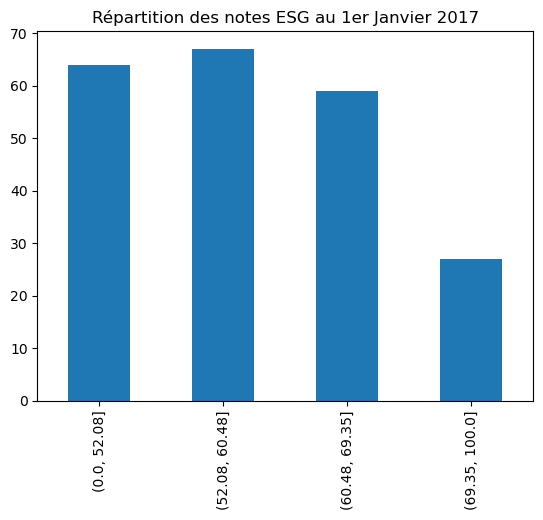

In [12]:

fig, ax = plt.subplots()
(
    pd.cut(New['2017-01-01'], W).value_counts()
        .sort_index()
        .plot.bar(ax=ax)
)
plt.title("Répartition des notes ESG au 1er Janvier 2017")
plt.savefig("NotesESG.png")

## Répartition des données au 1er Juillet  2019

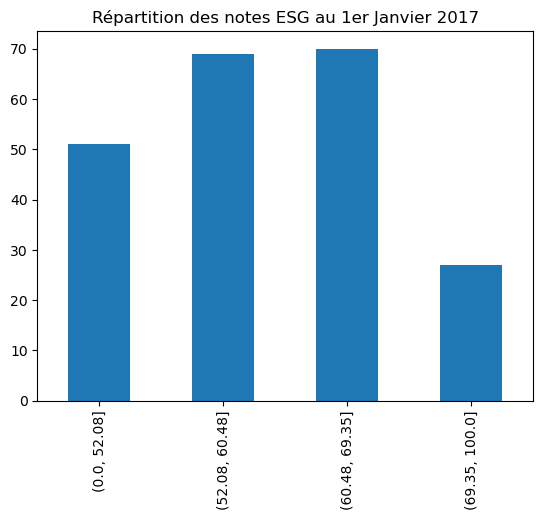

In [13]:

fig, ax = plt.subplots()
(
    pd.cut(New['2019-07-01'], W).value_counts()
        .sort_index()
        .plot.bar(ax=ax)
)
plt.title("Répartition des notes ESG au 1er Janvier 2017")
plt.savefig("NotesESG.png")

In [14]:
Initial=pd.DataFrame(Initial).transpose()
Initial

,"(52.08, 60.48]","(0.0, 52.08]","(60.48, 69.35]","(69.35, 100.0]"
2017-01-01,0.308756,0.294931,0.271889,0.124424


## Evolution dans le temps des Probabiltiés de chaque cluster

# Portefeuille Bullet

In [15]:
InitialBullet=pd.DataFrame([0,0.5,0.5,0])

In [16]:
InitialBullet.transpose()

,0,1,2,3
0,0.0,0.5,0.5,0.0


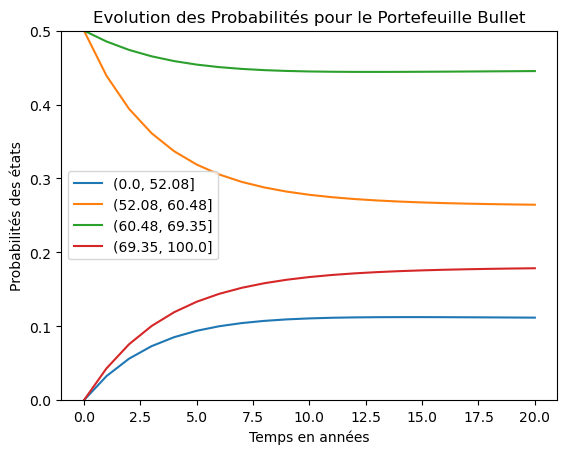

,"(0.0, 52.08]","(52.08, 60.48]","(60.48, 69.35]","(69.35, 100.0]"
0,0.000000,0.500000,0.500000,0.000000
1,0.032641,0.438979,0.485295,0.043085
2,0.056195,0.394191,0.473907,0.075707
3,0.073143,0.361215,0.465251,0.100391
4,0.085289,0.336857,0.458785,0.119068
5,0.093947,0.318806,0.454037,0.133209
6,0.100075,0.305381,0.450615,0.143930
7,0.104370,0.295358,0.448200,0.152073
8,0.107341,0.287844,0.446541,0.158273
9,0.109360,0.282186,0.445443,0.163010


In [17]:


import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
Final2=np.linalg.matrix_power(Final,2)
P = np.array(Final2)
state=InitialBullet.transpose()
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0]]
for x in range(20):
    state=np.dot(state,P)
    stateHist=np.append(stateHist,state/np.sum(state),axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
    dfDistrHist.columns=Final.index

dfDistrHist.plot()
plt.ylim(0,0.5)
plt.xlabel("Temps en années")
plt.ylabel("Probabilités des états")
plt.title("Evolution des Probabilités pour le Portefeuille Bullet")

plt.show()


dfDistrHist


# Portefeuille Ladder

In [18]:
InitialLadder=pd.DataFrame([0.25,0.25,0.25,0.25])

In [19]:
InitialLadder.transpose()

,0,1,2,3
0,0.25,0.25,0.25,0.25


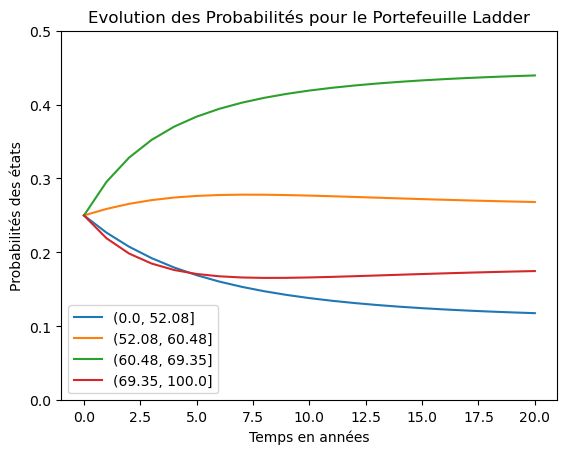

,"(0.0, 52.08]","(52.08, 60.48]","(60.48, 69.35]","(69.35, 100.0]"
0,0.250000,0.250000,0.250000,0.250000
1,0.226695,0.258794,0.295414,0.219097
2,0.207714,0.265662,0.328158,0.198466
3,0.192229,0.270712,0.352162,0.184897
4,0.179557,0.274195,0.370070,0.176178
5,0.169143,0.276402,0.383672,0.170783
6,0.160541,0.277614,0.394193,0.167653
7,0.153396,0.278076,0.402474,0.166054
8,0.147425,0.277994,0.409102,0.165478
9,0.142406,0.277532,0.414491,0.165571


In [20]:


import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
Final2=np.linalg.matrix_power(Final,2)
P = np.array(Final2)
state=InitialLadder.transpose()
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0]]
for x in range(20):
    state=np.dot(state,P)
    stateHist=np.append(stateHist,state/np.sum(state),axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
    dfDistrHist.columns=Final.index

dfDistrHist.plot()
plt.ylim(0,0.5)
plt.xlabel("Temps en années")
plt.ylabel("Probabilités des états")
plt.title("Evolution des Probabilités pour le Portefeuille Ladder")

plt.show()


dfDistrHist

# Portefeuille Barbell

In [21]:
InitialBarbell=pd.DataFrame([0.5,0,0,0.5])

In [22]:
InitialBarbell.transpose()

,0,1,2,3
0,0.5,0.0,0.0,0.5


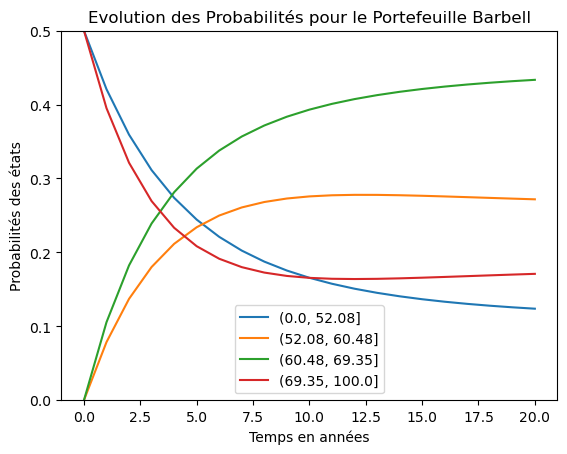

,"(0.0, 52.08]","(52.08, 60.48]","(60.48, 69.35]","(69.35, 100.0]"
0,0.500000,0.000000,0.000000,0.500000
1,0.420749,0.078609,0.105533,0.395110
2,0.359232,0.137132,0.182410,0.321226
3,0.311314,0.180209,0.239073,0.269403
4,0.273824,0.211532,0.281354,0.233289
5,0.244338,0.233998,0.313307,0.208357
6,0.221007,0.249847,0.337771,0.191376
7,0.202421,0.260794,0.356748,0.180036
8,0.187508,0.268144,0.371664,0.172683
9,0.175451,0.272878,0.383538,0.168132


In [23]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
Final2=np.linalg.matrix_power(Final,2)
P = np.array(Final2)
state=InitialBarbell.transpose()
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0,0]]
for x in range(20):
    state=np.dot(state,P)
    stateHist=np.append(stateHist,state/np.sum(state),axis=0)
    dfDistrHist = pd.DataFrame(stateHist)
    dfDistrHist.columns=Final.index

dfDistrHist.plot()
plt.ylim(0,0.5)
plt.xlabel("Temps en années")
plt.ylabel("Probabilités des états")
plt.title("Evolution des Probabilités pour le Portefeuille Barbell")

plt.show()


dfDistrHist

# Composition des Portefeuilles

In [24]:
NewBullet=New.transpose()[["CVX","BEN","HON","LLY","BR","HUM","GD","EMR","CMA","ABC","ADSK","CBRE","AEE","BDX","DTE","MMM","GS",
                        "XOM","BK","ABBV"]].transpose()
NewEqui=New.transpose()[["DISH","FTNT","RE","FLT","DG","DVA","CSX","IPG","HAL","CVX","EBAY","BWA","BXP","DIS","IFF","ADBE","BAC",
                        "GE","IBM","INTC"]].transpose()
NewBarbell=New.transpose()[["HPE","CLX","INTC","CPB","CSCO","BIIB","ADBE","CMS","HPQ","ACN","FIS","ATVI","FDS","AOS","EFX","CHRW",
                         "CSGP","GPC","CHTR","EXPE"]].transpose()

In [25]:
NewBarbellTest=NewBarbell.iloc[::-1]

In [26]:
df2={'Composition du Bullet':list(NewBullet.index),
    'Note ESG de Chaque Actif du Bullet': list(NewBullet["2017-01-01"]),
    'Composition du Ladder':list(NewEqui.index),
     'Note ESG de Chaque Actif du Ladder': list(NewEqui["2017-01-01"]),
     'Composition du Barbell':list(NewBarbellTest.index),
          'Note ESG de Chaque Actif du Barbell': list(NewBarbellTest["2017-01-01"]) }
     
     
     
     
test2=pd.DataFrame(df2,index=["Actif n°1","Actif n°2","Actif n°3" , "Actif n°4", "Actif n°5", "Actif n°6","Actif n°7", "Actif n°8","Actif n°9", 
                              "Actif n°10","Actif n°11","Actif n°12","Actif n°13","Actif n°14","Actif n°15","Actif n°16","Actif n°17","Actif n°18",
                             "Actif n°19","Actif n°20"])
test2

,Composition du Bullet,Note ESG de Chaque Actif du Bullet,Composition du Ladder,Note ESG de Chaque Actif du Ladder,Composition du Barbell,Note ESG de Chaque Actif du Barbell
Actif n°1,CVX,59.43,DISH,42.83,EXPE,46.45
Actif n°2,BEN,56.52,FTNT,47.75,CHTR,45.03
Actif n°3,HON,56.65,RE,47.41,GPC,46.65
Actif n°4,LLY,58.15,FLT,45.47,CSGP,46.20
Actif n°5,BR,52.39,DG,49.83,CHRW,45.66
Actif n°6,HUM,58.13,DVA,55.30,EFX,46.80
Actif n°7,GD,54.60,CSX,59.82,AOS,46.51
Actif n°8,EMR,58.21,IPG,56.16,FDS,45.42
Actif n°9,CMA,60.19,HAL,58.83,ATVI,46.86
Actif n°10,ABC,52.34,CVX,59.43,FIS,46.95


In [27]:
Name=["Information Technology","Industrials","Financials","Consumer Discretionary","Health Care","Consumer Staples",
     "Real Estate","Utilities","Materials","Energy","Communication Services"]

In [28]:
LBullet=["Chevron Corporation","Franklin Templeton","Honeywell","Eli Lilly and Company","Broadridge Financial Solutions",
  "Humana","General Dynamics","Emerson Electric","Comerica","AmerisourceBergen","Autodesk","CBRE Group","Ameren","Becton Dickinson",
        "DTE Energy","3M","Goldman Sachs","ExxonMobil","BNY Mellon","AbbVie"]

LLadder=["Dish Network","Fortinet","Everest Re","Fleetcor","Dollar General","DaVita Inc.","CSX","The Interpublic Group of Companies",
        "Halliburton","Chevron Corporation","eBay","BorgWarner","Boston Properties","Disney","International Flavors & Fragrances",
        "Adobe Inc.","Bank of America","General Electric","IBM","Intel"]

LBarbell=["Expedia Group","Charter Communications","Genuine Parts Company","CoStar Group","C.H. Robinson","Equifax",
         "A. O. Smith","FactSet","Activision Blizzard","FIS","Accenture","HP Inc.","CMS Energy","Adobe Inc.",
         "Biogen","Cisco","Campbell Soup Company","	Intel","Clorox","Hewlett Packard Enterprise"]


In [29]:
dfBarbell={  "Composition du Barbell":LBarbell,
           "Secteur de chaque actif du Barbell":[Name[2],Name[4],Name[2],"Consumer Staples",Name[2],"Health Care","Information Technology",Name[6],
                                                Name[2],Name[2],Name[2],Name[3],Name[7],"Industrials",Name[0],Name[0],"Industrials",Name[5],
                                                Name[3],Name[5]][::-1],
           "Note ESG de chaque actif du Barbell":test2["Note ESG de Chaque Actif du Barbell"]}

dfBarbell2=pd.DataFrame(dfBarbell,index=["Actif n°1","Actif n°2","Actif n°3" , "Actif n°4", "Actif n°5", "Actif n°6","Actif n°7", "Actif n°8","Actif n°9", 
                              "Actif n°10","Actif n°11","Actif n°12","Actif n°13","Actif n°14","Actif n°15","Actif n°16","Actif n°17","Actif n°18",
                             "Actif n°19","Actif n°20"])

dfBarbell2


dfBullet={#"Composition du Bullet":TBullet,
          "Composition du Bullet":LBullet,
         "Secteur de chaque actif du Bullet":[Name[10],"Financials","Industrials","Health Care","Information Technology",
                                             "Health Care","Industrials","Industrials","Financials","Health Care",
                                             "Information Technology","Real Estate","Utilities","Health Care","Utilities",
                                             "Industrials","Financials","Energy","Financials","Health Care"],
         "Note ESG de chaque actif du Bullet":test2["Note ESG de Chaque Actif du Bullet"]}

dfBullet2=pd.DataFrame(dfBullet,index=["Actif n°1","Actif n°2","Actif n°3" , "Actif n°4", "Actif n°5", "Actif n°6","Actif n°7", "Actif n°8","Actif n°9", 
                              "Actif n°10","Actif n°11","Actif n°12","Actif n°13","Actif n°14","Actif n°15","Actif n°16","Actif n°17","Actif n°18",
                             "Actif n°19","Actif n°20"])

dfLadder={#"Composition du Ladder":TLadder,
          "Composition du Ladder":LLadder,
         "Secteur de chaque actif du Ladder":["Communication Services","Information Technology","Financials","Information Technology",
                                              "Consumer Discretionary","Health Care","Industrials","Communication Services","Energy",
                                              "Energy","Consumer Discretionary","Consumer Discretionary","Real Estate","Communication Services",
                                              "Materials","Information Technology","Financials","Industrials","Information Technology","Information Technology"],
           "Note ESG de chaque actif du Ladder":test2["Note ESG de Chaque Actif du Ladder"]}
         

dfLadder2=pd.DataFrame(dfLadder,index=["Actif n°1","Actif n°2","Actif n°3" , "Actif n°4", "Actif n°5", "Actif n°6","Actif n°7", "Actif n°8","Actif n°9", 
                              "Actif n°10","Actif n°11","Actif n°12","Actif n°13","Actif n°14","Actif n°15","Actif n°16","Actif n°17","Actif n°18",
                             "Actif n°19","Actif n°20"])

In [30]:
Firstjoin=dfBullet2.join(dfLadder2)
Firstjoin
SecondJoin=Firstjoin.join(dfBarbell2)
SecondJoin

,Composition du Bullet,Secteur de chaque actif du Bullet,Note ESG de chaque actif du Bullet,Composition du Ladder,Secteur de chaque actif du Ladder,Note ESG de chaque actif du Ladder,Composition du Barbell,Secteur de chaque actif du Barbell,Note ESG de chaque actif du Barbell
Actif n°1,Chevron Corporation,Communication Services,59.43,Dish Network,Communication Services,42.83,Expedia Group,Consumer Staples,46.45
Actif n°2,Franklin Templeton,Financials,56.52,Fortinet,Information Technology,47.75,Charter Communications,Consumer Discretionary,45.03
Actif n°3,Honeywell,Industrials,56.65,Everest Re,Financials,47.41,Genuine Parts Company,Consumer Staples,46.65
Actif n°4,Eli Lilly and Company,Health Care,58.15,Fleetcor,Information Technology,45.47,CoStar Group,Industrials,46.20
Actif n°5,Broadridge Financial Solutions,Information Technology,52.39,Dollar General,Consumer Discretionary,49.83,C.H. Robinson,Information Technology,45.66
Actif n°6,Humana,Health Care,58.13,DaVita Inc.,Health Care,55.30,Equifax,Information Technology,46.80
Actif n°7,General Dynamics,Industrials,54.60,CSX,Industrials,59.82,A. O. Smith,Industrials,46.51
Actif n°8,Emerson Electric,Industrials,58.21,The Interpublic Group of Companies,Communication Services,56.16,FactSet,Utilities,45.42
Actif n°9,Comerica,Financials,60.19,Halliburton,Energy,58.83,Activision Blizzard,Consumer Discretionary,46.86
Actif n°10,AmerisourceBergen,Health Care,52.34,Chevron Corporation,Energy,59.43,FIS,Financials,46.95


# Notation des Portefeuilles

Text(0.5, 0, 'Notation ESG des actifs')

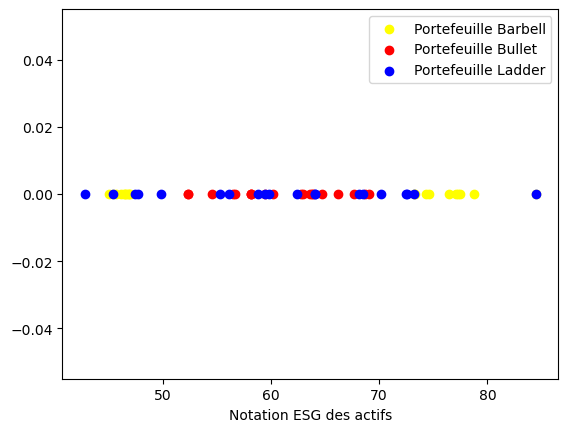

In [31]:
X = NewBarbell["2017-01-01"]
Y=NewBullet["2017-01-01"]
V=NewEqui["2017-01-01"]
plt.scatter( X, [0] * X.shape[0],c="yellow",label="Portefeuille Barbell")
plt.scatter( Y, [0] * Y.shape[0],c="red",label="Portefeuille Bullet")
plt.scatter(V,[0]*V.shape[0],c="blue",label="Portefeuille Ladder")
plt.legend()

plt.xlabel("Notation ESG des actifs")



Text(0.5, 1.0, 'Répartition des notes ESG du Portefeuille Barbell')

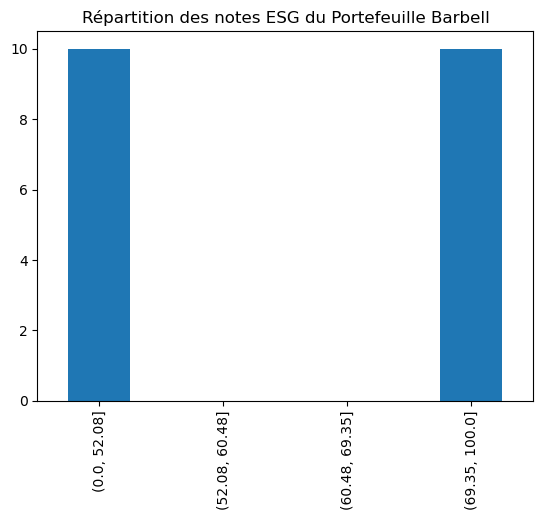

In [32]:

fig, ax = plt.subplots()
(
    pd.cut(NewBarbell['2017-01-01'], W).value_counts()
        .sort_index()
        .plot.bar(ax=ax)
)
plt.title("Répartition des notes ESG du Portefeuille Barbell")

Text(0.5, 1.0, 'Répartition des notes ESG du Portefeuille Ladder')

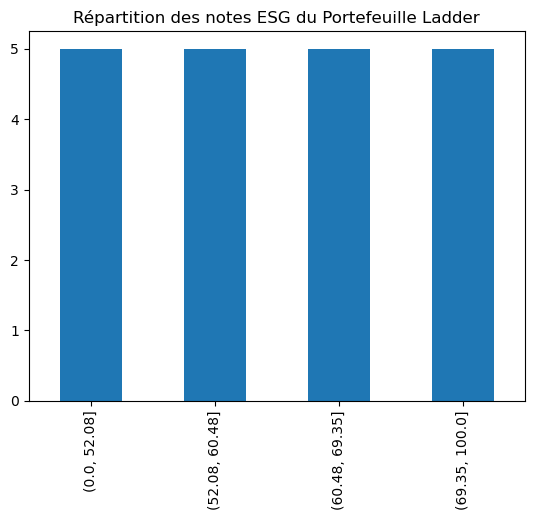

In [33]:

fig, ax = plt.subplots()
(
    pd.cut(NewEqui['2017-01-01'], W).value_counts()
        .sort_index()
        .plot.bar(ax=ax)
)
plt.title("Répartition des notes ESG du Portefeuille Ladder")

Text(0.5, 1.0, 'Répartition des notes ESG du Portefeuille Bullet')

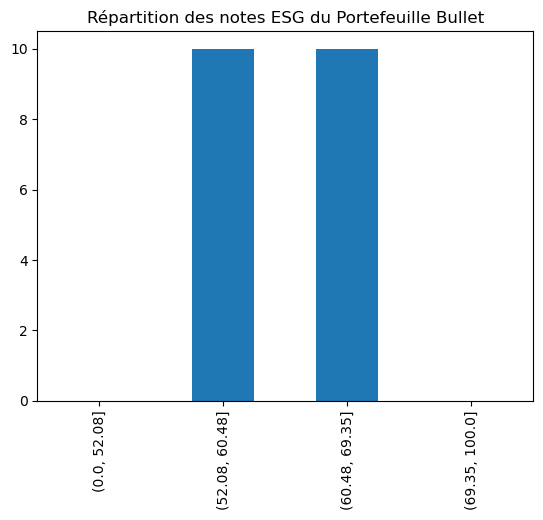

In [34]:

fig, ax = plt.subplots()
(
    pd.cut(NewBullet['2017-01-01'], W).value_counts()
        .sort_index()
        .plot.bar(ax=ax)
)
plt.title("Répartition des notes ESG du Portefeuille Bullet")

# Evolution du Portefeuille à différents horizons

In [35]:
def PredictionNotes2(Temps,test):
    return np.dot(test,np.linalg.matrix_power(Final,2*Temps))

Test1=np.array([0,0.5,0.5,0]) # Bullet
Test2=np.array([0.5,0,0,0.5]) # Barbell
Test3=np.array([0.25,0.25,0.25,0.25]) # Equi

In [36]:
df2={'Proportion du Bullet dans chaque cluster ':[[0,0.5,0.5,0],[round(element,2) for element in PredictionNotes2(1,Test1)], [round(element,2) for element in PredictionNotes2(2,Test1)],[round(element,2) for element in PredictionNotes2(3,Test1)],[round(element,2) for element in PredictionNotes2(5,Test1)]]
                                                  ,
    'Proportion du Ladder dans chaque cluster': [[0.25,0.25,0.25,0.25],[round(element,2) for element in PredictionNotes2(1,Test3)],[round(element,2) for element in PredictionNotes2(2,Test3)],[round(element,2) for element in PredictionNotes2(3,Test3)],[round(element,2) for element in PredictionNotes2(5,Test3)]],
     'Proportion du Barbell dans chaque cluster':[[0.5,0,0,0.5],[round(element,2) for element in PredictionNotes2(1,Test2)],[round(element,2) for element in PredictionNotes2(2,Test2)],[round(element,2) for element in PredictionNotes2(3,Test2)],[round(element,2) for element in PredictionNotes2(5,Test2)]]
                                                  }
     
     
     
     
test2=pd.DataFrame(df2,index=["Etat Initial","Horizon 1 an","Horizon 2 ans","Horizon 3 ans","Horizon 5 ans"])
test2

,Proportion du Bullet dans chaque cluster,Proportion du Ladder dans chaque cluster,Proportion du Barbell dans chaque cluster
Etat Initial,"[0, 0.5, 0.5, 0]","[0.25, 0.25, 0.25, 0.25]","[0.5, 0, 0, 0.5]"
Horizon 1 an,"[0.03, 0.44, 0.49, 0.04]","[0.23, 0.26, 0.3, 0.22]","[0.42, 0.08, 0.11, 0.4]"
Horizon 2 ans,"[0.06, 0.39, 0.47, 0.08]","[0.21, 0.27, 0.33, 0.2]","[0.36, 0.14, 0.18, 0.32]"
Horizon 3 ans,"[0.07, 0.36, 0.47, 0.1]","[0.19, 0.27, 0.35, 0.18]","[0.31, 0.18, 0.24, 0.27]"
Horizon 5 ans,"[0.09, 0.32, 0.45, 0.13]","[0.17, 0.28, 0.38, 0.17]","[0.24, 0.23, 0.31, 0.21]"


# Calcul des Métriques

In [37]:
def UtilityMarkowitz(port,i=int):
    p=4
    if port=="Barbell":
        moyenne=NewBarbell.describe()[B[i]]["mean"]
        variance=pow(ecarttype(NewBarbellMetrique,NewBarbell.describe()[B[i]]["mean"]),2)
        return moyenne-0.005*p*variance
    if port=="Bullet":
        moyenne=NewBullet.describe()[B[i]]["mean"]
        variance=pow(ecarttype(NewBulletMetrique,NewBullet.describe()[B[i]]["mean"]),2)
        return moyenne-0.005*p*variance
    if port=="Ladder":
        moyenne=NewEqui.describe()[B[i]]["mean"]
        variance=pow(ecarttype(NewEquiMetrique,NewEqui.describe()[B[i]]["mean"]),2)
        return moyenne-0.005*p*variance
        
        

In [38]:
def ecarttype(x,u):
    sum=0
    a=10-1
    for element in x:
        sum+=pow(element-u,2)
    sum=sum/a
    return np.sqrt(sum)

In [39]:
B=["2017-01-01","2019-07-01"]

In [40]:
NewEquiMetrique=NewEqui[NewEqui["2017-01-01"]<NewEqui.describe()["2017-01-01"]["mean"]]["2017-01-01"]
NewBarbellMetrique=NewBarbell[NewBarbell["2017-01-01"]<NewBarbell.describe()["2017-01-01"]["mean"]]["2017-01-01"]
NewBulletMetrique=NewBullet[NewBullet["2017-01-01"]<NewBullet.describe()["2017-01-01"]["mean"]]["2017-01-01"]

##  Métriques au 1er Janvier 2017

In [41]:
data = {'Bullet':[NewBullet.describe()[B[0]]["mean"], NewBullet.describe()[B[0]]["std"],ecarttype(NewBulletMetrique,NewBullet.describe()[B[0]]["mean"]), NewBullet.describe()[B[0]]["std"]/ NewBullet.describe()[B[0]]["mean"],ecarttype(NewBulletMetrique,NewBullet.describe()[B[0]]["mean"])/NewBullet.describe()[B[0]]["mean"],UtilityMarkowitz("Bullet",0)],
         'Ladder':[NewEqui.describe()[B[0]]["mean"], NewEqui.describe()[B[0]]["std"],ecarttype(NewEquiMetrique,NewEqui.describe()[B[0]]["mean"]), NewEqui.describe()[B[0]]["std"]/ NewEqui.describe()[B[0]]["mean"],ecarttype(NewEquiMetrique,NewEqui.describe()[B[0]]["mean"])/NewEqui.describe()[B[0]]["mean"],UtilityMarkowitz("Ladder",0)],
    'Barbell':[NewBarbell.describe()[B[0]]["mean"],NewBarbell.describe()[B[0]]["std"], ecarttype(NewBarbellMetrique,NewBarbell.describe()[B[0]]["mean"]),NewBarbell.describe()[B[0]]["std"]/NewBarbell.describe()[B[0]]["mean"],ecarttype(NewBarbellMetrique,NewBarbell.describe()[B[0]]["mean"])/NewBarbell.describe()[B[0]]["mean"],UtilityMarkowitz("Barbell",0)],
       }
df = pd.DataFrame(data, index=['Moyenne ','Ecart-Type','Ecart-Type à la baisse','Coefficient de variation','Coefficient de variation à la baisse','Utilité de Markowitz'])
df

,Bullet,Ladder,Barbell
Moyenne,60.999500,61.149000,61.473500
Ecart-Type,5.108441,10.999706,15.788306
Ecart-Type à la baisse,5.336475,11.289276,16.057522
Coefficient de variation,0.083746,0.179884,0.256831
Coefficient de variation à la baisse,0.087484,0.184619,0.261210
Utilité de Markowitz,60.429941,58.600045,56.316620


In [42]:
pd.DataFrame(df.iloc[0,:]).transpose()
data3={'Bullet':61.000,
       'Ladder':61.149,
       'Barbell':61.474}
df3=pd.DataFrame(data3,index=['Moyenne'])
df3

,Bullet,Ladder,Barbell
Moyenne,61.0,61.149,61.474


In [43]:
pd.DataFrame(df.iloc[0,:]).transpose()

,Bullet,Ladder,Barbell
Moyenne,60.9995,61.149,61.4735


In [44]:
data2={'Bullet':[61.00,5.108,5.336,0.084,0.087,60.430],
         'Ladder':[61.149,11.000,9.513,0.180,0.156,59.339],
    'Barbell':[61.474,15.788,16.058,0.257,0.261,56.317]
       }
df4 = pd.DataFrame(data2, index=['Moyenne ','Ecart-Type','Ecart-Type à la baisse','Coefficient de variation','Coefficient de variation à la baisse','Utilité de Markowitz'])
df4

,Bullet,Ladder,Barbell
Moyenne,61.000,61.149,61.474
Ecart-Type,5.108,11.000,15.788
Ecart-Type à la baisse,5.336,9.513,16.058
Coefficient de variation,0.084,0.180,0.257
Coefficient de variation à la baisse,0.087,0.156,0.261
Utilité de Markowitz,60.430,59.339,56.317


# Métriques au 1er Juillet 2019

In [45]:
data3 = {'Bullet':[NewBullet.describe()[B[1]]["mean"], NewBullet.describe()[B[1]]["std"],ecarttype(NewBulletMetrique,NewBullet.describe()[B[1]]["mean"]), NewBullet.describe()[B[0]]["std"]/ NewBullet.describe()[B[1]]["mean"],ecarttype(NewBulletMetrique,NewBullet.describe()[B[1]]["mean"])/NewBullet.describe()[B[1]]["mean"],UtilityMarkowitz("Bullet",1)],
         'Ladder':[NewEqui.describe()[B[1]]["mean"], NewEqui.describe()[B[1]]["std"],ecarttype(NewEquiMetrique,NewEqui.describe()[B[1]]["mean"]), NewEqui.describe()[B[0]]["std"]/ NewEqui.describe()[B[1]]["mean"],ecarttype(NewEquiMetrique,NewEqui.describe()[B[1]]["mean"])/NewEqui.describe()[B[1]]["mean"],UtilityMarkowitz("Ladder",1)],
    'Barbell':[NewBarbell.describe()[B[1]]["mean"],NewBarbell.describe()[B[1]]["std"], ecarttype(NewBarbellMetrique,NewBarbell.describe()[B[1]]["mean"]),NewBarbell.describe()[B[0]]["std"]/NewBarbell.describe()[B[1]]["mean"],ecarttype(NewBarbellMetrique,NewBarbell.describe()[B[1]]["mean"])/NewBarbell.describe()[B[1]]["mean"],UtilityMarkowitz("Barbell",1)],
       }
df3 = pd.DataFrame(data3, index=['Moyenne ','Ecart-Type','Ecart-Type à la baisse','Coefficient de variation','Coefficient de variation à la baisse','Utilité de Markowitz'])
df3

,Bullet,Ladder,Barbell
Moyenne,61.002000,60.609500,61.009000
Ecart-Type,5.860994,11.391357,16.119543
Ecart-Type à la baisse,5.338734,10.823207,15.568327
Coefficient de variation,0.083742,0.181485,0.258787
Coefficient de variation à la baisse,0.087517,0.178573,0.255181
Utilité de Markowitz,60.431958,58.266664,56.161544


# Construction des Portefeuilles 

In [46]:
ValeurBarbell1=[i for i in range(0,len(New[(New["2017-01-01"]>73)]))]
ValeurBarbell2=[i for i in range(0,len(New[(New["2017-01-01"]<47)]))]

liste1Barbell=sample(ValeurBarbell1,10)
liste2Barbell=sample(ValeurBarbell2,10)

NewBarbell1=New[(New["2017-01-01"]>73)].iloc[liste1Barbell]
NewBarbell2=New[(New["2017-01-01"]<47)].iloc[liste2Barbell]
BarbellCreation=pd.concat([NewBarbell1,NewBarbell2])
BarbellCreation

,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01
INTC,84.46,84.46,84.46,84.46,83.65,83.65,83.65,85.90,85.90,85.51,...,87.39,87.39,87.39,87.39,85.88,85.88,85.88,85.88,17.02,17.02
CMS,77.32,77.32,77.32,77.32,77.06,77.06,77.06,77.06,78.52,77.89,...,77.32,77.32,77.32,77.04,77.04,77.04,80.82,80.84,80.27,27.62
ACN,74.58,74.58,74.58,74.58,74.58,74.58,74.58,74.58,74.58,74.18,...,73.76,73.76,73.76,73.76,73.76,73.76,73.71,73.71,15.32,15.32
CPB,77.05,77.05,77.05,77.05,76.74,76.74,76.74,76.74,76.74,73.82,...,73.43,73.01,72.79,72.79,72.79,72.79,72.79,72.79,71.15,24.36
ADBE,73.25,73.25,73.25,73.25,73.50,73.50,73.50,67.68,67.68,68.67,...,67.03,67.03,67.03,67.03,69.43,69.43,69.43,69.41,13.44,13.59
HES,73.83,73.83,73.83,73.83,73.70,73.70,73.70,73.70,73.70,72.91,...,78.20,78.20,78.20,78.20,78.32,78.32,79.15,79.15,78.37,31.56
CSCO,78.77,78.77,78.77,78.77,80.23,80.23,80.23,80.23,80.23,78.97,...,80.15,80.15,80.15,80.15,80.15,80.15,80.15,79.98,14.11,14.11
HPE,76.42,76.42,78.37,78.37,77.27,77.27,77.27,79.67,79.67,80.22,...,79.51,79.51,79.48,79.48,80.24,80.24,80.22,78.06,17.21,17.21
BIIB,74.33,74.33,73.48,73.48,73.48,73.48,73.48,73.48,72.69,72.45,...,66.97,66.97,66.94,66.94,66.94,66.94,67.02,67.02,23.51,23.49
HPQ,77.42,77.42,77.42,77.42,77.87,77.87,77.87,76.72,76.72,76.22,...,85.86,85.86,85.86,85.86,85.90,85.90,85.90,87.41,86.84,11.44


In [47]:
ValeurBullet1=[i for i in range(0,len(New[(New["2017-01-01"]>52.08) & (New["2017-01-01"]<60.5)]))]
ValeurBullet2=[i for i in range(0,len(New[(New["2017-01-01"]>60.5) & (New["2017-01-01"]<69.35)]))]

liste1=sample(ValeurBullet1,10)
liste2=sample(ValeurBullet2,10)

NewBullet1=New[(New["2017-01-01"]>52.08) & (New["2017-01-01"]<60.5)].iloc[liste1]
NewBullet2=New[(New["2017-01-01"]>60.5) & (New["2017-01-01"]<69.35)].iloc[liste2]
BulletCreation=pd.concat([NewBullet1,NewBullet2])
BulletCreation

,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01
EIX,59.81,59.81,59.81,59.81,61.24,61.24,61.24,61.24,61.24,58.74,...,64.57,64.57,64.57,64.57,64.57,64.57,64.77,64.77,65.08,38.22
CAG,58.16,58.16,58.16,58.16,58.16,58.16,58.16,58.16,58.16,56.71,...,58.60,59.01,59.01,59.01,59.01,59.01,59.01,59.23,59.82,29.20
IPG,56.16,56.16,56.16,56.16,55.96,55.96,55.96,55.96,55.96,57.41,...,59.47,59.31,59.85,58.13,58.13,58.13,59.13,59.13,57.46,16.14
HSIC,58.22,58.22,58.22,58.22,58.22,58.22,58.22,58.22,58.22,57.68,...,59.51,59.51,59.51,59.51,59.51,59.51,59.51,56.03,54.41,15.25
GM,57.97,56.17,56.17,56.17,56.17,56.17,56.17,56.77,56.77,54.43,...,65.47,65.47,65.47,65.47,65.47,65.76,65.73,65.95,30.87,30.87
DFS,52.19,52.19,52.19,52.19,52.19,55.02,52.19,55.02,55.02,56.33,...,58.28,58.28,58.28,58.28,58.28,58.28,58.28,58.43,57.90,20.82
HIG,55.80,55.80,57.32,57.32,57.11,57.06,57.11,57.06,57.06,57.22,...,68.26,68.26,68.26,68.26,68.26,68.26,68.26,68.86,67.01,20.55
CMG,54.63,54.63,54.63,54.63,54.63,54.63,54.63,54.63,55.16,54.89,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,56.50,55.69,24.94
HON,56.65,56.65,56.65,56.65,56.87,56.87,56.87,56.87,56.87,56.60,...,53.78,53.02,53.02,53.30,53.30,53.30,53.30,53.30,38.50,38.50
AFL,56.70,56.70,56.70,56.70,57.41,57.41,57.41,57.41,57.41,57.74,...,53.69,53.69,53.69,53.69,53.69,53.69,53.69,53.89,53.37,24.38


In [48]:
ValeurEqui1=[i for i in range(0,len(New[(New["2017-01-01"]<50)]))]
ValeurEqui2=[i for i in range(0,len(New[(New["2017-01-01"]>53) & (New["2017-01-01"]<60)]))]
ValeurEqui3=[i for i in range(0,len(New[(New["2017-01-01"]>61) & (New["2017-01-01"]<69)]))]
ValeurEqui4=[i for i in range(0,len(New[(New["2017-01-01"]>70)]))]

liste1Equi=sample(ValeurEqui1,5)
liste2Equi=sample(ValeurEqui2,5)
liste3Equi=sample(ValeurEqui3,5)
liste4Equi=sample(ValeurEqui4,5)

NewEqui1=New[New["2017-01-01"]<50].iloc[liste1Equi]
NewEqui2=New[(New["2017-01-01"]>53) & (New["2017-01-01"]<60)].iloc[liste2Equi]
NewEqui3=New[(New["2017-01-01"]>61) & (New["2017-01-01"]<69)].iloc[liste3Equi]
NewEqui4=New[(New["2017-01-01"]>70)].iloc[liste4Equi]
EquiCreation=pd.concat([NewEqui1,NewEqui2,NewEqui3,NewEqui4])
EquiCreation

,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01
FISV,45.37,45.33,45.33,45.33,45.33,45.33,45.33,45.33,45.86,46.51,...,46.36,46.36,46.36,46.36,46.36,46.36,46.36,46.36,45.32,19.62
AOS,46.51,46.51,46.51,46.51,46.51,46.51,46.51,46.51,46.87,47.18,...,46.73,46.73,46.69,46.61,46.61,46.61,46.61,46.61,46.18,25.14
DPZ,43.72,43.72,43.72,43.72,43.72,43.72,43.72,43.72,43.72,43.63,...,44.21,44.21,44.21,44.26,44.26,44.26,44.26,44.26,43.35,27.63
FRT,48.10,48.10,48.10,48.10,48.10,48.08,48.10,48.08,48.08,48.02,...,54.95,54.95,54.95,59.71,59.71,59.71,59.71,59.71,58.58,16.10
ANSS,45.68,45.68,45.68,45.68,45.68,45.68,45.68,45.68,47.94,49.13,...,53.27,53.27,53.27,53.60,53.60,53.60,53.60,53.60,53.45,15.87
CE,57.14,57.14,57.14,57.14,57.14,57.14,57.14,57.11,57.11,56.11,...,56.52,56.52,56.73,56.73,58.18,58.40,58.40,58.75,57.83,34.36
CSX,59.82,59.82,59.82,59.06,57.36,57.32,57.36,57.32,57.32,55.25,...,54.90,55.80,55.80,55.80,55.80,55.80,55.55,55.55,22.42,22.42
DUK,57.53,57.53,57.53,57.53,57.66,57.66,57.66,59.96,59.96,62.19,...,63.09,63.09,63.09,63.09,63.09,63.09,63.09,63.09,33.99,33.99
DRI,57.98,57.98,57.98,57.98,56.36,56.36,56.36,57.86,57.86,57.14,...,50.79,51.83,51.83,51.05,51.32,51.32,51.32,51.32,50.05,22.35
LNT,57.82,57.82,57.82,57.82,57.15,57.15,57.15,57.15,57.15,55.79,...,63.32,63.32,63.32,63.32,63.32,63.32,63.32,63.42,63.97,35.42
